# Nobel Laureates, 1901-Present
## About Dataset
Between **1901 and 2016**, the Nobel Prizes and the Prize in **Economic Sciences were awarded 579 times to 911 people and organizations**. The Nobel Prize is an international award administered by the Nobel Foundation in Stockholm, Sweden, and based on the fortune of Alfred Nobel, Swedish inventor and entrepreneur. In 1968, Sveriges Riksbank established The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel, founder of the Nobel Prize. Each Prize consists of a medal, a personal diploma, and a cash award.

A person or organization awarded the Nobel Prize is called Nobel Laureate. The word "laureate" refers to being signified by the laurel wreath. In ancient Greece, laurel wreaths were awarded to victors as a sign of honor.

## Content
This dataset includes a record for every individual or organization that was awarded the Nobel Prize since 1901.

## Acknowledgements
The Nobel laureate data was acquired from the Nobel Prize API.

## Inspiration
**Exploring the representation of men and women in prize-winning novels across different categories, analyzing USA dominance, and visualizing prize winners across various age groups.**

In [1]:
# importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# converting data to dataframe
df = pd.read_csv('../dataAnalysis/nobelprice.csv')

df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
df.shape

(969, 18)

In [4]:
# Display information about the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [5]:
# Compute the sum of missing values for each column in the DataFrame 'df'
df.isnull().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

# Null value handling

In [6]:
# Fill missing values in the DataFrame 'df' with the string 'Not Specified'
df.fillna('Not Specified', inplace=True)

In [7]:
df.isna().sum()

Year                    0
Category                0
Prize                   0
Motivation              0
Prize Share             0
Laureate ID             0
Laureate Type           0
Full Name               0
Birth Date              0
Birth City              0
Birth Country           0
Sex                     0
Organization Name       0
Organization City       0
Organization Country    0
Death Date              0
Death City              0
Death Country           0
dtype: int64

# Which is Top Gender and Country?

In [8]:
top_gender = df['Sex'].value_counts().index[0]
top_country = df['Birth Country'].value_counts().index[0]
'Top gender and country to win nobel price = ',top_gender, top_country


('Top gender and country to win nobel price = ',
 'Male',
 'United States of America')

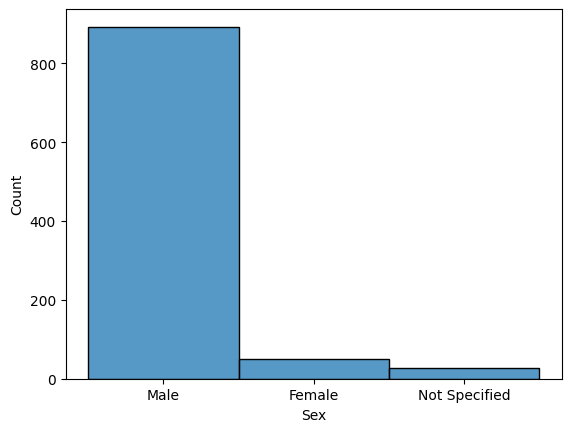

In [9]:
sns.histplot(data=df, x='Sex')
plt.show()

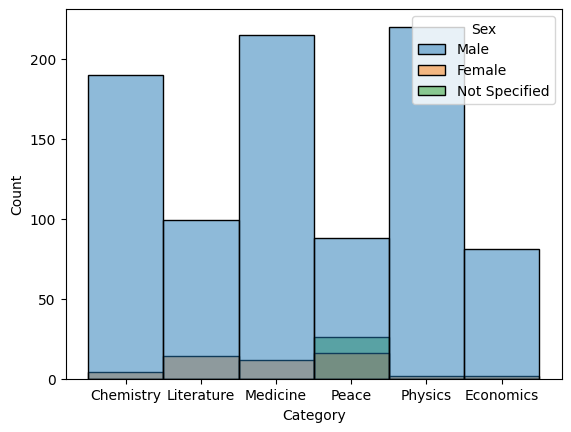

In [10]:
sns.histplot(data=df, x='Category', hue='Sex')
plt.show()

# Porportion of USA Born Winner per decade

In [11]:
df['usa_born_winner'] = df['Birth Country'] == 'United States of America'
df['decade'] = (df['Year'] // 10) * 10
prop_usa_winners = df.groupby('decade', as_index=False)['usa_born_winner'].mean()

In [12]:
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

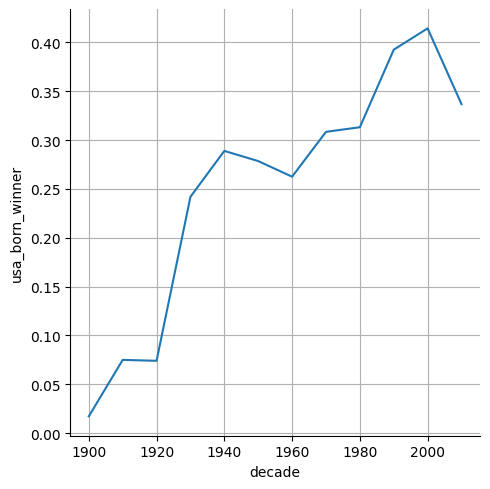

In [13]:
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")
plt.grid()

# Plotting female winners with % winners on the y-axis

In [14]:
df['female_winner'] = df['Sex'] == 'Female'
prop_female_winners = df.groupby(['decade', 'Category'], as_index=False)['female_winner'].mean()

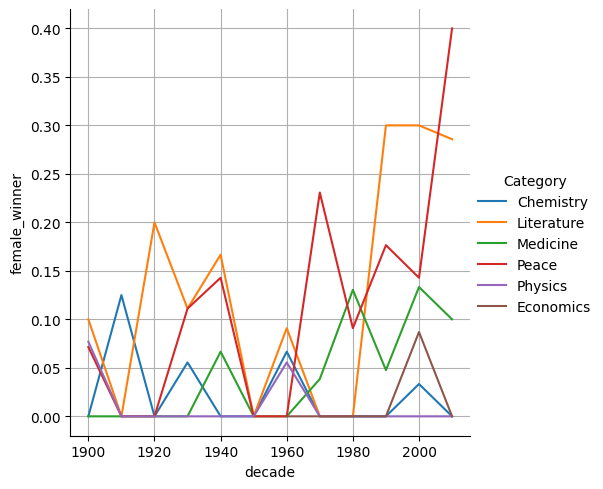

In [15]:
ax2 = sns.relplot(x='decade', y='female_winner', hue='Category', data=prop_female_winners, kind="line")
plt.grid()

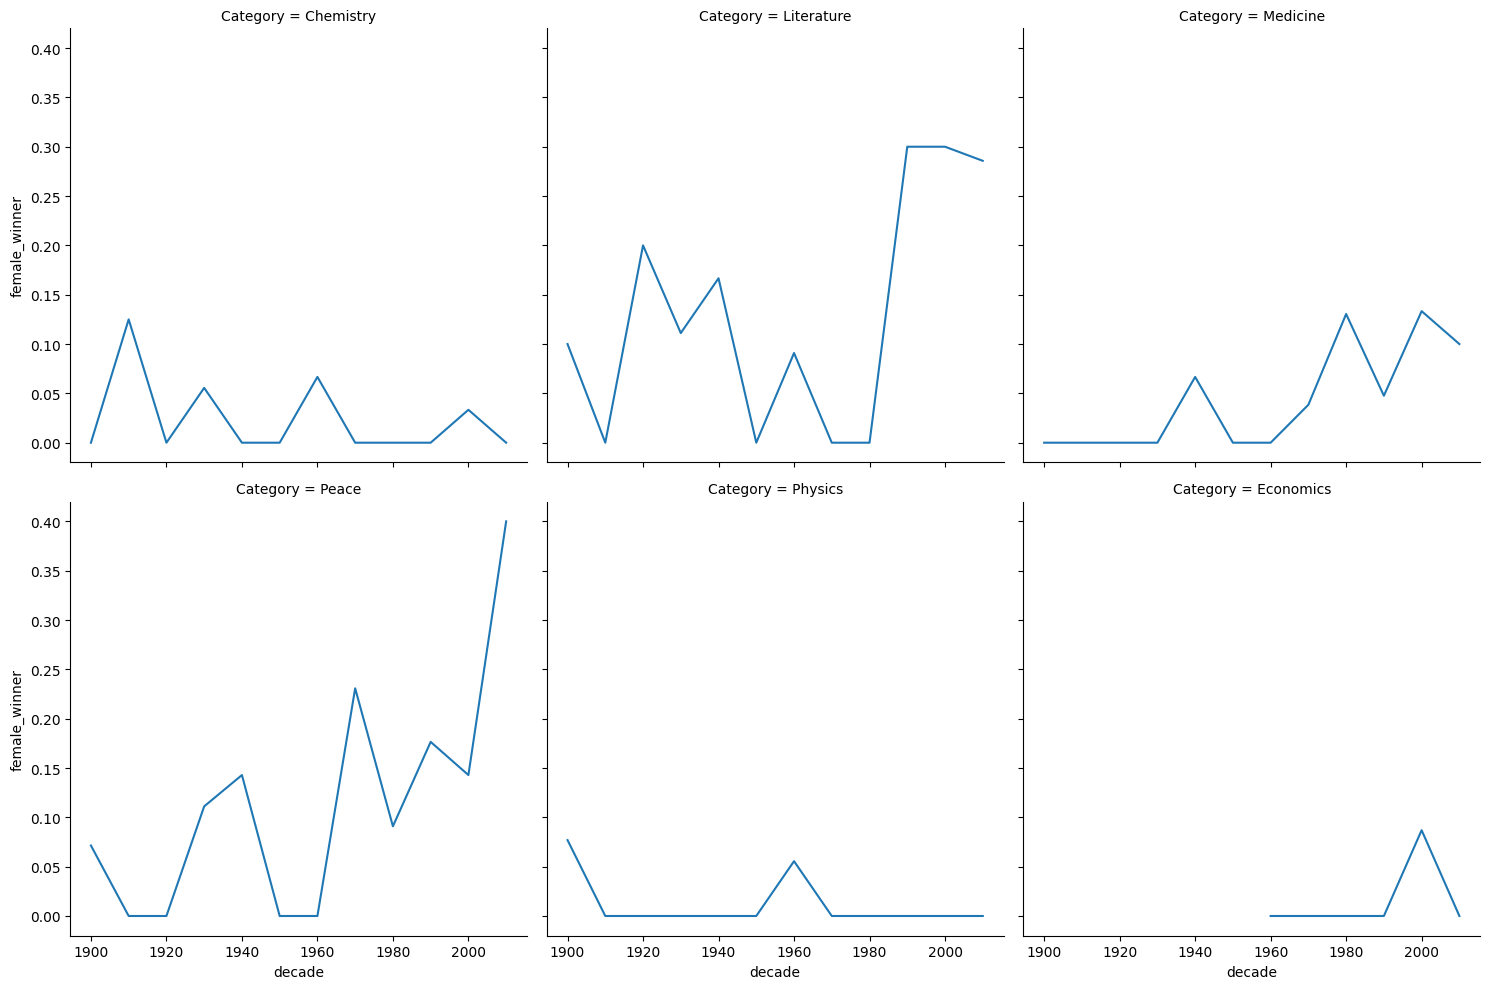

In [16]:
ax2 = sns.relplot(x='decade', y='female_winner', col='Category', col_wrap=3, data=prop_female_winners, kind="line")

# Plotting male winners with % winners on the y-axis

In [17]:
df['male_winner'] = df['Sex'] == 'Male'
prop_male_winners = df.groupby(['decade', 'Category'], as_index=False)['male_winner'].mean()

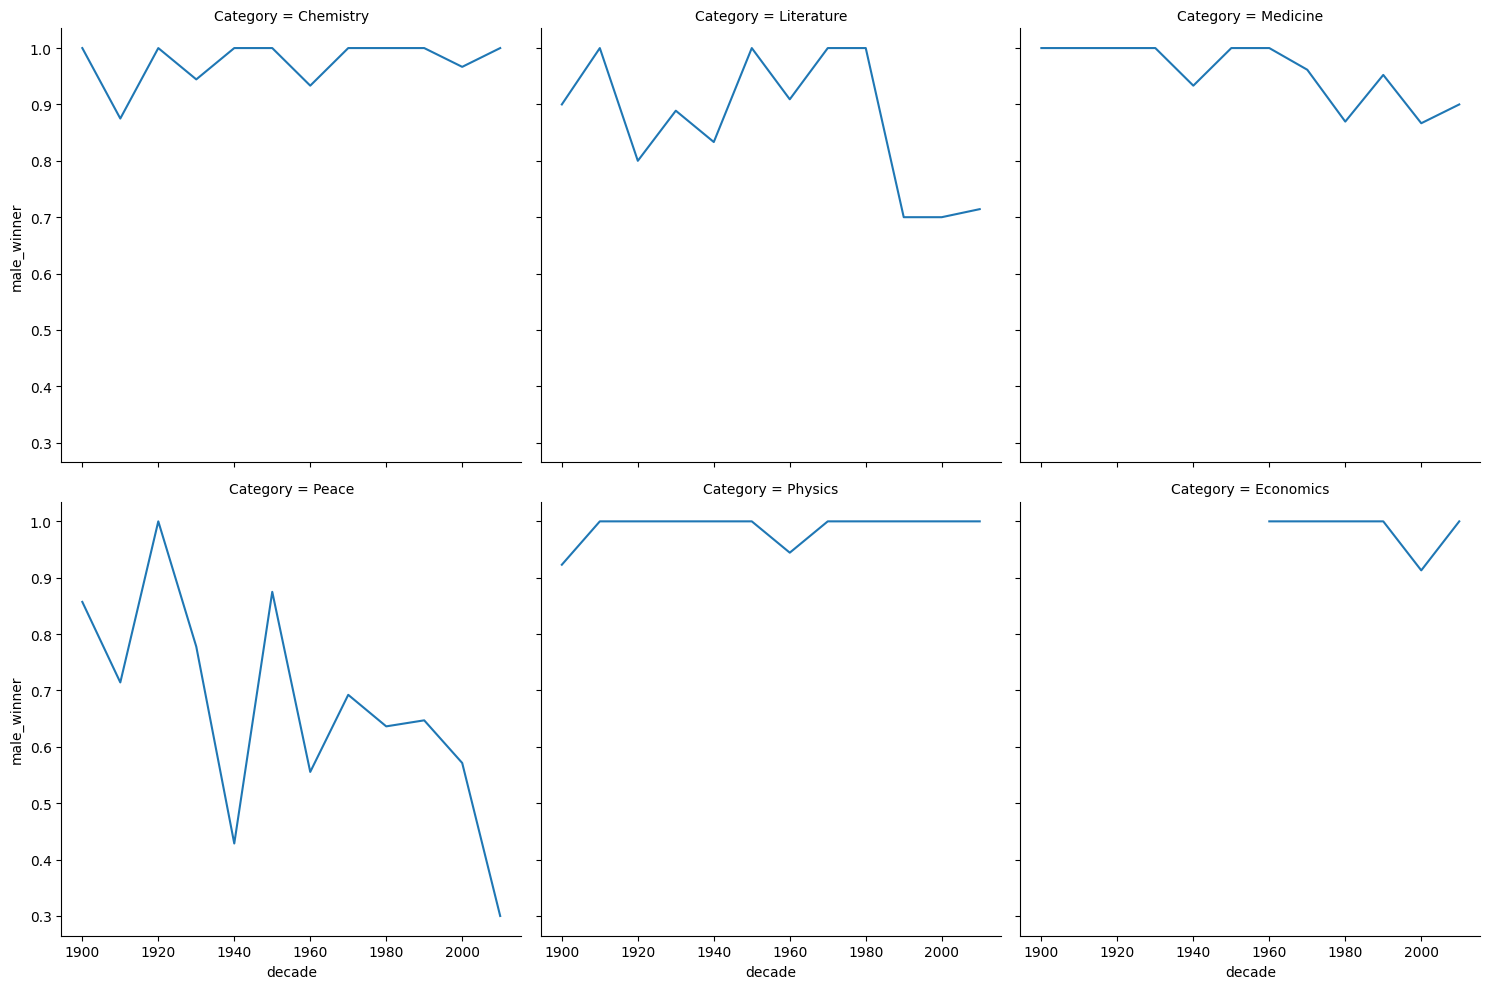

In [18]:
# Plotting a line plot using Seaborn's relplot
ax2 = sns.relplot(x='decade', y='male_winner', col='Category', col_wrap=3, data=prop_male_winners, kind="line")

In [19]:
df.columns

Index(['Year', 'Category', 'Prize', 'Motivation', 'Prize Share', 'Laureate ID',
       'Laureate Type', 'Full Name', 'Birth Date', 'Birth City',
       'Birth Country', 'Sex', 'Organization Name', 'Organization City',
       'Organization Country', 'Death Date', 'Death City', 'Death Country',
       'usa_born_winner', 'decade', 'female_winner', 'male_winner'],
      dtype='object')

# Novel Price Winner With Different Age Category 

In [20]:
# Convert 'Birth Date' and 'Year' columns to datetime format
df['Birth Date'] = pd.to_datetime(df['Birth Date'], errors='coerce')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Calculate age
df['Age'] = df['Year'].dt.year - df['Birth Date'].dt.year

In [21]:
# Define age groups
def age_group(age):
    if age < 20:
        return '<20'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    else:
        return '70+'

# Apply age_group function to create 'Age Group' column
df['Age Group'] = df['Age'].apply(age_group)

# Find the eldest person
oldest_person = df[df['Age'] == df['Age'].max()]

# Find the eldest person
youngest_person = df[df['Age'] == df['Age'].min()]


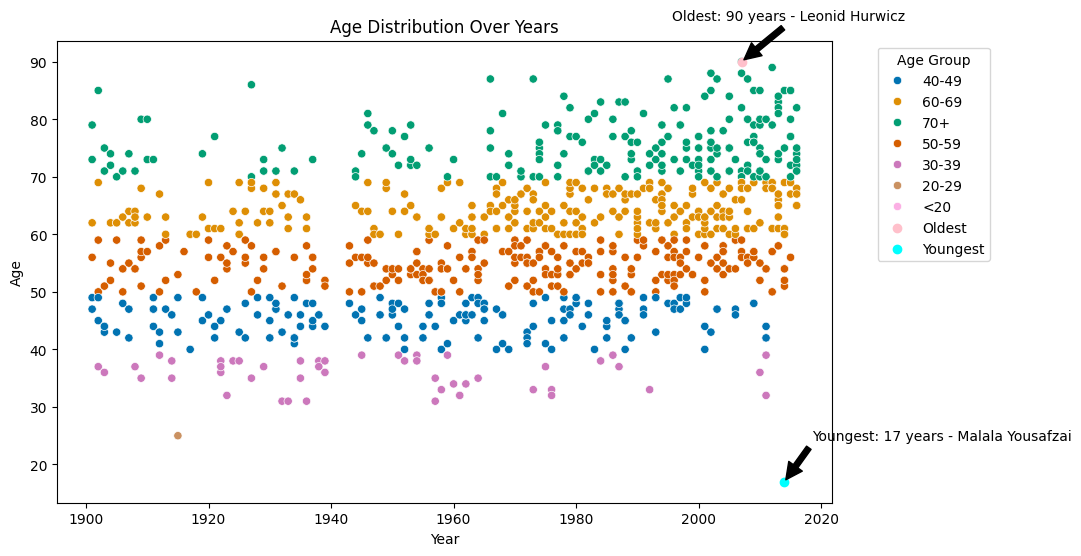

In [22]:
# Plot scatterplot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Age', hue='Age Group', palette='colorblind')

# Plot the oldest person with a pink dot
plt.scatter(oldest_person['Year'], oldest_person['Age'], color='pink', label='Oldest')

# Annotate the eldest person with an arrow
plt.annotate('Oldest: {} years - {}'.format(int(oldest_person['Age'].iloc[0]), oldest_person['Full Name'].iloc[0]),
             xy=(oldest_person['Year'].iloc[0], oldest_person['Age'].iloc[0]), 
             xytext=(-50, 30), textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.05))

# Plot the youngest person with a cyan dot
plt.scatter(youngest_person['Year'], youngest_person['Age'], color='cyan', label='Youngest')

# Annotate the youngest person with an arrow
plt.annotate('Youngest: {} years - {}'.format(int(youngest_person['Age'].iloc[0]), youngest_person['Full Name'].iloc[0]),
             xy=(youngest_person['Year'].iloc[0], youngest_person['Age'].iloc[0]), 
             xytext=(20, 30), textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Age Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Age')

# Move the legend outside the plot
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [23]:
df.shape


(969, 24)